[1.0, 1.6666666666666665, 2.142857142857143, 2.5, 2.7777777777777777, 2.9999999999999996, 3.181818181818182, 3.333333333333333, 3.4615384615384612, 3.571428571428571, 3.666666666666666, 3.75, 3.8235294117647056, 3.8888888888888884, 3.9473684210526314, 4.0, 4.0476190476190474, 4.090909090909091, 4.130434782608695, 4.166666666666666, 4.2, 4.23076923076923, 4.2592592592592595, 4.285714285714286, 4.310344827586206, 4.333333333333333, 4.354838709677419, 4.375, 4.393939393939394, 4.411764705882352, 4.428571428571428, 4.444444444444445, 4.45945945945946, 4.473684210526316, 4.487179487179487, 4.5, 4.512195121951219, 4.523809523809524, 4.534883720930232, 4.545454545454546, 4.555555555555555, 4.565217391304348, 4.574468085106383, 4.583333333333333, 4.591836734693877, 4.6, 4.607843137254902, 4.615384615384615, 4.622641509433962, 4.629629629629629, 4.636363636363636, 4.642857142857142, 4.649122807017544, 4.655172413793103, 4.6610169491525415, 4.666666666666666, 4.672131147540983, 4.677419354838709

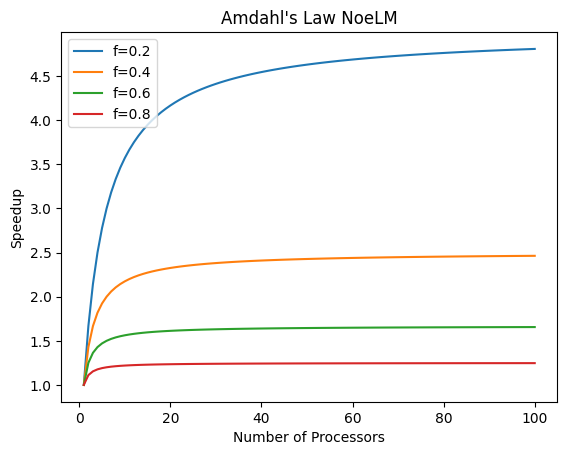

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def amdahl_speedup(f, p):
    return 1 / (f + (1 - f) / p)

# Define the fractions and the range of processors
fractions = [0.2, 0.4, 0.6, 0.8]
processors = np.arange(1, 101)

fig, ax = plt.subplots()

for f in fractions:
    speedup = [amdahl_speedup(f, p) for p in processors]
    print(speedup)
    ax.plot(processors, speedup, label='f={}'.format(f))

ax.set_xlabel('Number of Processors')
ax.set_ylabel('Speedup')
ax.set_title('Amdahl\'s Law NoeLM')
ax.legend()

plt.show()

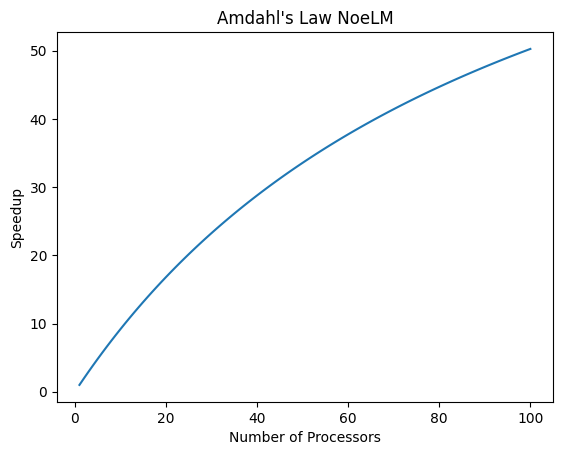

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n = 10000
f = 1/100

def amdahl_speedup(p):
    return 1 / (f + (1-f)/p)

processors = np.arange(1, 101)
speedup = [amdahl_speedup(p) for p in processors]

plt.plot(processors, speedup)
plt.xlabel('Number of Processors')
plt.ylabel('Speedup')
plt.title('Amdahl\'s Law NoeLM')
plt.show()

[1.0, 1.958095238095238, 2.672443674176776, 3.4381270903010033, 3.4427327528466174, 3.8890290037831017, 4.2858844550327575, 4.6410835214446955, 3.6948881789137378, 3.8530734632683656, 3.9929378531073443, 4.117489986648865, 4.229113924050633, 4.329723225030085, 4.420871559633028, 4.503833515881708, 3.258623904531046, 3.2936988252046993, 3.325727907372723, 3.3550913838120104, 3.3821087263042457, 3.40705031636035, 3.4301465254606125, 3.4515948517067714, 3.471565581521005, 3.4902063201880384, 3.507645646404651, 3.523996082272282, 3.5393565238038702, 3.553814242913113, 3.5674465465129295, 3.5803221593382673, 2.5884327788799024, 2.594418052256532, 2.6000867177337765, 2.6054632497887917, 2.6105696636925186, 2.6154258168184255, 2.620049666710234, 2.624457492979321, 2.6286640888112762, 2.6326829268292684, 2.636526303232733, 2.6402054634601915, 2.6437307120813807, 2.6471115091804744, 2.6503565551289086, 2.6534738653473866, 2.6564708364096616, 2.6593543046357615, 2.6621305981517214, 2.66480558325

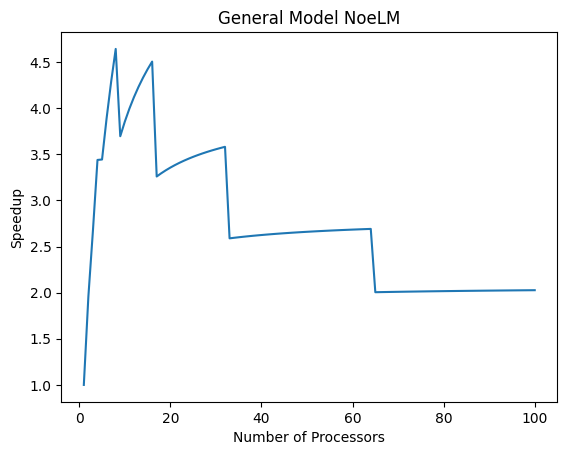

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

n = 10000

def time_seq(n):
    return (18000 + n) + (n**2/100)

def time_comm(n, p):
    return 10000*math.ceil(math.log2(p)) + n/10

def time_par(n, p):
    return time_seq(n) / p + time_comm(n, p) * math.ceil(math.log2(p))

def speedup_gen(n, p):
    return time_seq(n) / time_par(n, p)

processors = np.arange(1, 101)
speedup_values = [speedup_gen(n, p) for p in processors]

print(speedup_values)
plt.plot(processors, speedup_values)
plt.xlabel('Number of Processors')
plt.ylabel('Speedup')
plt.title('General Model NoeLM')
plt.show()

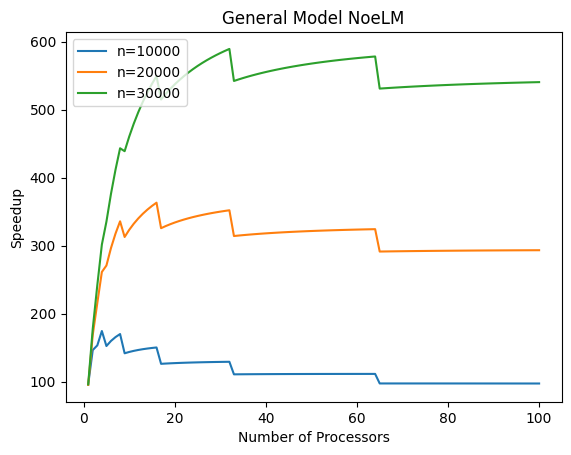

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def general_speedup(p, n):
    overhead = n * (np.log2(n) + np.log2(p))
    comm_time = 0
    for i in range(int(np.log2(n))):
        comm_time += 10000 * (np.ceil(np.log2(p)) - 1) + n / 10
    comp_time = n**2 / (100 * p)
    return n**2 / (comp_time + overhead + comm_time + 18000 + n)

processors = np.arange(1, 101)

for n in [10000, 20000, 30000]:
    speedup = [general_speedup(p, n) for p in processors]
    plt.plot(processors, speedup, label=f'n={n}')

plt.xlabel('Number of Processors')
plt.ylabel('Speedup')
plt.title('General Model NoeLM')
plt.legend()
plt.show()